In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.linalg import eig
import cmath

In [3]:
M = np.array([[8500,0],[0,11000]])
k1 = 90E3
k2 = 85E3
K = np.array([[k1+k2,-k2],[-k2,k2]])

Eig_value,Eig_vector = eig(K,M)

Eig_vector = np.flip(Eig_vector,axis = 1)
print('Normilization:',Eig_vector[0,:])
Eig_vector = Eig_vector/Eig_vector[0,:]

w = np.sqrt(np.real(np.flip(Eig_value)))
#Get Hz
f = w / (2*np.pi)

for idx, i in enumerate(Eig_value):
    print('            ######### Mode',idx+1,'#########')
    print('Rotational Frequency:',w[idx],'[rad/s]')
    print('Frequency           :',f[idx],'[Hz]')
    print('Mode Shape          :',Eig_vector[:,idx])

Normilization: [0.49996906 0.9132504 ]
            ######### Mode 1 #########
Rotational Frequency: 1.8072902015305867 [rad/s]
Frequency           : 0.2876391691751406 [Hz]
Mode Shape          : [1.         1.73219374]
            ######### Mode 2 #########
Rotational Frequency: 5.004918595625897 [rad/s]
Frequency           : 0.7965575342664084 [Hz]
Mode Shape          : [ 1.         -0.44609749]


In [4]:
M = np.array([[8500,0],[0,11000]])
k1 = 90E3
k2 = 85E3
K = np.array([[k2,-k2],[-k2,k2]])

Eig_value,Eig_vector = eig(K,M)

Eig_vector = np.flip(Eig_vector,axis = 1)
print('Normilization:',Eig_vector[0,:])
Eig_vector = Eig_vector/Eig_vector[0,:]

w = np.sqrt(np.real(np.flip(Eig_value)))
#Get Hz
f = w / (2*np.pi)

for idx, i in enumerate(Eig_value):
    print('            ######### Mode',idx+1,'#########')
    print('Rotational Frequency:',w[idx],'[rad/s]')
    print('Frequency           :',f[idx],'[Hz]')
    print('Mode Shape          :',Eig_vector[:,idx])

Normilization: [0.70710678 0.791285  ]
            ######### Mode 1 #########
Rotational Frequency: 0.0 [rad/s]
Frequency           : 0.0 [Hz]
Mode Shape          : [1. 1.]
            ######### Mode 2 #########
Rotational Frequency: 4.210376791603422 [rad/s]
Frequency           : 0.6701022786630795 [Hz]
Mode Shape          : [ 1.         -0.77272727]


# Q2c

In [16]:
def ExitationFunction(t):
    return 0,0

def ForcingFunction(t):
    if t<1:
        return 3000*t
    elif (t>=1) and (t <2):
        return 3000*(2-t)
    else:
        return 0

def DerivativeX(X,t):
    #print(X)
    Xdis = X[0:len(M)]
    Xvel = X[len(M):]
    F = np.zeros(len(M))
    #print(Xdis,Xvel)
    
    
    ### Forcing a displacement on a mass:
    Xdis[0],Xvel[0] = ExitationFunction(t)
    ### Forcing with a forcing function:
    F[1] = ForcingFunction(t)
        
    term1 = np.matmul(-np.linalg.inv(M), K)
    term2 = np.matmul(-np.linalg.inv(M), C)
    term3 = np.matmul(np.linalg.inv(M), F)  
    xdd = np.matmul(term1,Xdis) + np.matmul(term2,Xvel) + term3
    
    return np.append(Xvel,xdd)
def SolveSystem(t):
    return odeint(DerivativeX,InitialConditions,t)


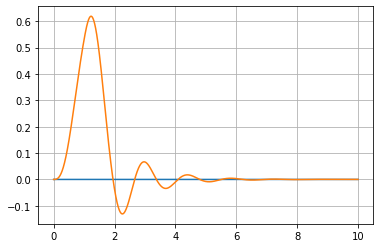

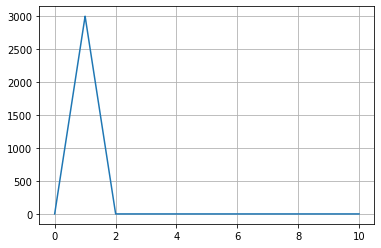

In [18]:
t0 = 0
t1 = 10

m0 = 1
m = 270

k1 = 3500
k2 = 2000

c1 = 150
c2 = 360

M = np.array([[m0,0],[0,m]])
K = np.array([[k1+k2,-k1-k2],[-k1-k2,k1+k2]])
C = np.array([[c1+c2,-c1-c2],[-c1-c2,c1+c2]])


InitialConditions = np.array([0,0,0,0])

##Solving
res = 100000
t = np.linspace(t0,t1,res)
sol = SolveSystem(t)

##Plotting
plt.figure(0)
plt.grid()
plt.plot(t,sol[:,0])
plt.plot(t,sol[:,1])
plt.figure(1)
plt.grid()

def bla(t):
    a = []
    for i in t:
        a.append(ForcingFunction(i))
        
    return a
plt.plot(t,bla(t))